In [48]:
import yfinance as yf 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings ('ignore') 

In [6]:
stock_data = yf.download ('AAPL', start='2024-01-01') 

[*********************100%***********************]  1 of 1 completed


In [8]:
stock_data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.290436,187.070083,182.553158,185.789453,82488700
2024-01-03,182.910538,184.528693,182.096492,182.880757,58414500
2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600
2024-01-05,179.862823,181.431339,178.860172,180.666948,62303300
2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500
2024-01-09,183.794067,183.803989,181.401584,182.582935,42841800
2024-01-10,184.836426,185.044891,182.582924,183.009806,46792900
2024-01-11,184.240768,185.690161,182.285089,185.183859,49128400


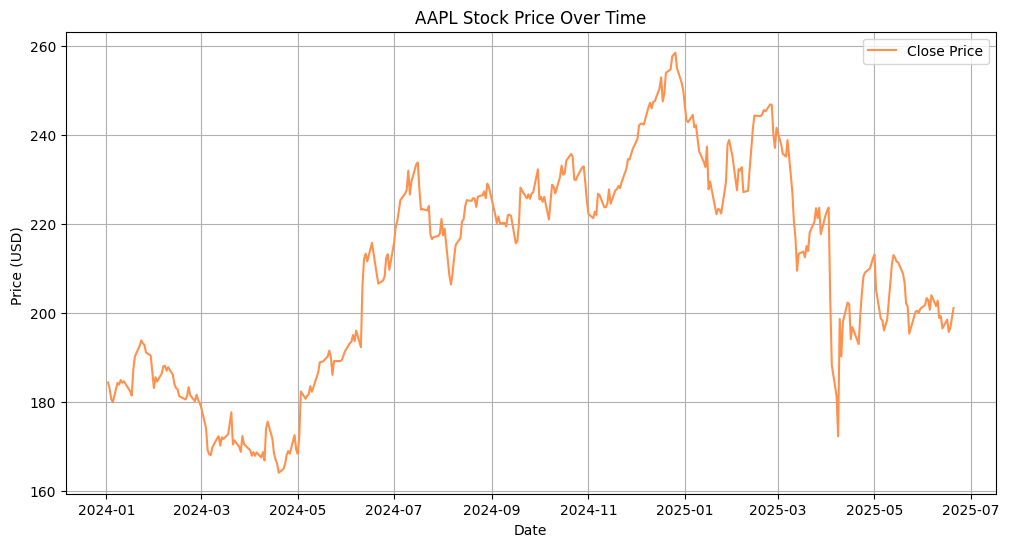

In [12]:
plt. figure(figsize=(12, 6)) 
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color = '#FF914D')
plt.title('AAPL Stock Price Over Time') 
plt.xlabel( 'Date') 
plt.ylabel('Price (USD) ') 
plt. legend () 
plt.grid(True) 
plt.show( )

### Classical Time Series Decomposition 

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [19]:
decomposition_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30) 
trend_additive = decomposition_additive.trend 
seasonal_additive = decomposition_additive.seasonal 
residual_additive = decomposition_additive.resid

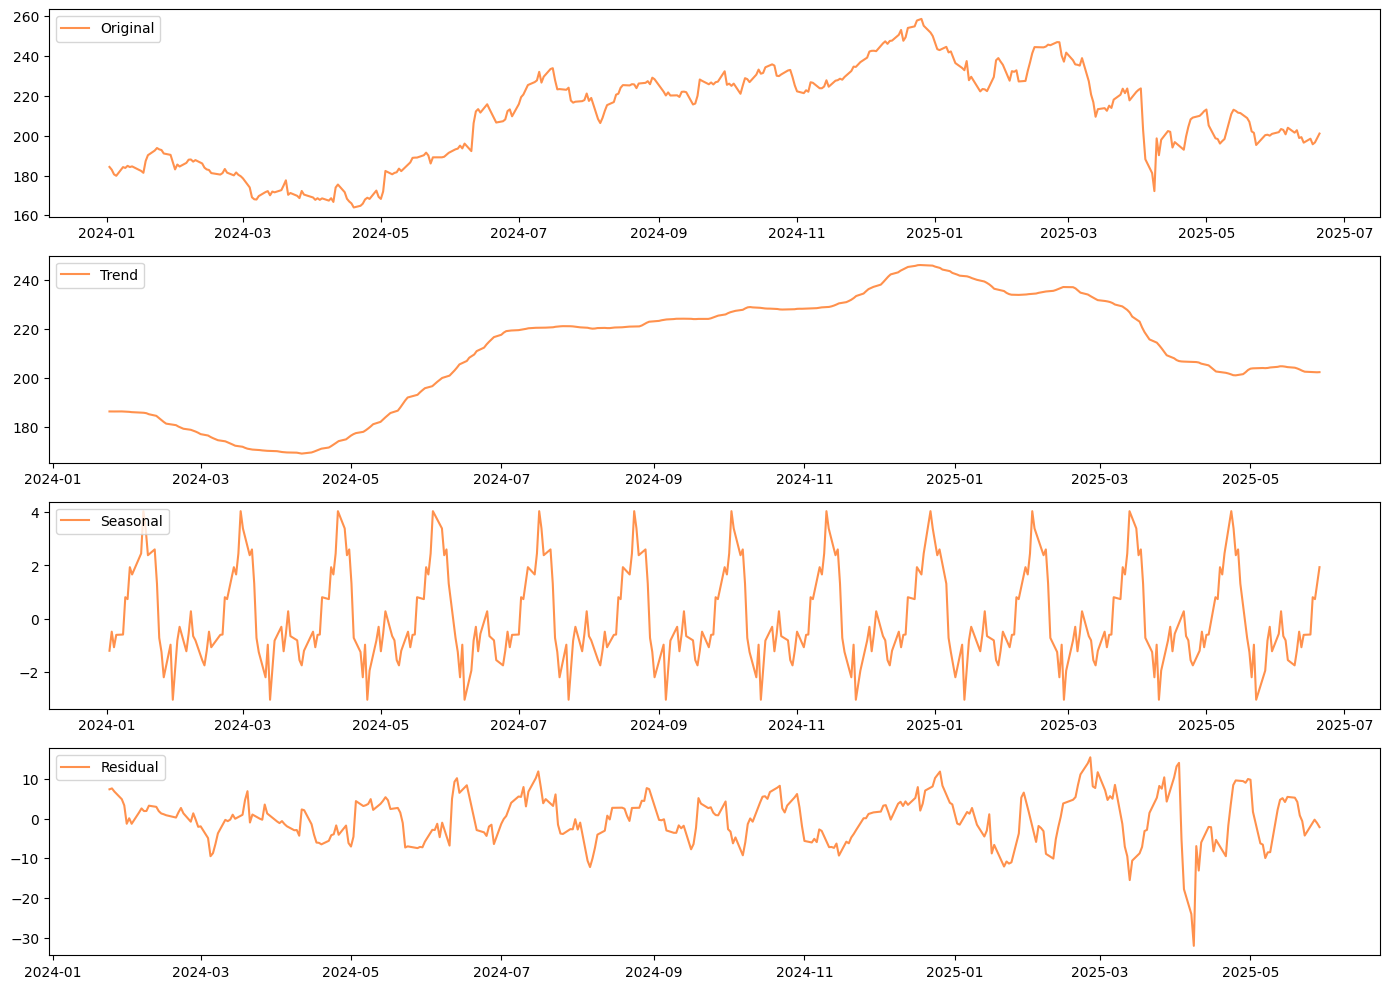

In [25]:
plt.figure(figsize=(14, 10)) 
plt. subplot (411) 
plt.plot(stock_data['Close'], label='Original', color = '#FF914D') 
plt. legend (loc='upper left') 

# Trend plot
plt. subplot(412) 
plt. plot(trend_additive, label='Trend', color = '#FF914D') 

# Seasonal plot
plt.legend (loc='upper left') 
plt.subplot (413) 
plt.plot(seasonal_additive, label='Seasonal', color = '#FF914D' ) 

# Residual plot
plt.legend (loc='upper left') 
plt.subplot (414) 
plt.plot(residual_additive, label='Residual', color = '#FF914D') 
plt.legend (loc='upper left') 
plt.tight_layout () 
plt.show()

### STL Decomposition

In [27]:
from statsmodels.tsa.seasonal import STL 

#Perform STL decomposition 
stl = STL(stock_data['Close'], period=30) 
result = stl.fit() 

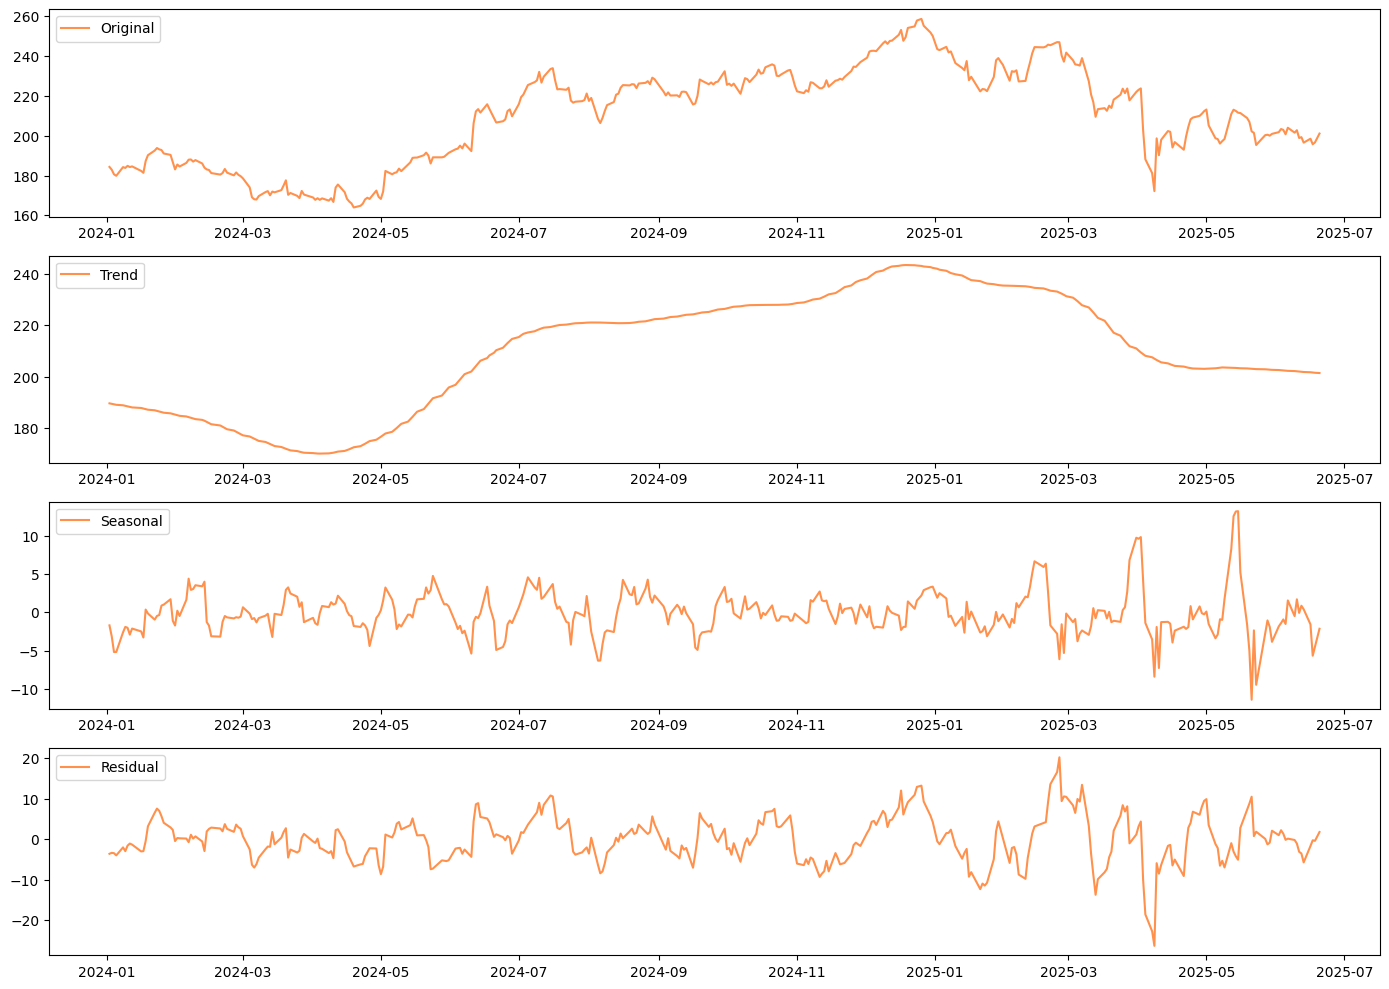

In [29]:
# Plot the decomposition components 
plt.figure(figsize=(14, 10)) 
plt.subplot (411) 
plt.plot(result.observed, label='Original', color = '#FF914D') 
plt.legend (loc='upper left') 

plt. subplot (412) 
plt.plot(result.trend, label='Trend', color = '#FF914D' ) 
plt.legend (loc='upper left') 

plt. subplot (413) 
plt.plot(result.seasonal, label='Seasonal', color = '#FF914D') 
plt. legend (loc='upper left') 
plt. subplot (414) 
    
plt. plot(result. resid, label='Residual', color = '#FF914D') 
plt. legend (loc='upper left') 
plt. tight_layout () 
plt. show()


### Testing for Stationarity

In [41]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [50]:
# Performing ADF test for the stationarity check - Augmented Dickey Fuller 
adf_test = adfuller(stock_data['Close'])
print ("ADF Test results")
print (f'ADF-Statistics : {round(adf_test[0],3)}')
print (f'p-value: {round(adf_test[1],3)}')
print ('Critical Values:')
for key, value in adf_test[4].items():
    print (f' {key} : {round(value,3)}')

ADF Test results
ADF-Statistics : -1.81
p-value: 0.375
Critical Values:
 1% : -3.448
 5% : -2.87
 10% : -2.571


In [49]:
# Performing KPSS test on the same data 
kpss_test = kpss(stock_data['Close'], regression = 'ct')
print ("KPSS Test results")
print (f'KPSS-Statistics : {round(kpss_test[0],3)}')
print (f'p-value: {round(kpss_test[1],3)}')
print ('Critical values:')
for key, value in kpss_test[3].items():
    print (f' {key} : {round(value,3)}')

KPSS Test results
KPSS-Statistics : 0.564
p-value: 0.01
Critical values:
 10% : 0.119
 5% : 0.146
 2.5% : 0.176
 1% : 0.216
